In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
print("Finished loading libraries")

Finished loading libraries


# Data collection

In [2]:
## Load the data and concatenate them into a single DataFrame
lung1 = pd.read_csv("GSE87340.csv.zip")
lung2 = pd.read_csv("GSE60052.csv.zip")
#lung3 = pd.read_csv("GSE40419.csv.zip")
lung4 = pd.read_csv("GSE37764.csv.zip")
lung_1_4 = pd.concat([lung1, lung2, lung4])
print("Finished loading the data")

Finished loading the data


In [3]:
print(lung_1_4.shape)

(149, 58737)


In [4]:
## Print the first 5 rows and 10 columns
print(lung_1_4.iloc[:,0:10].head())

           ID    class  ENSG00000000003  ENSG00000000005  ENSG00000000419  \
0  SRR4296063   Normal        10.728260         4.668142        10.278195   
1  SRR4296064    Tumor        11.332606         2.329988        10.127734   
2  SRR4296065   Normal         9.951182         4.264426        10.288874   
3  SRR4296066    Tumor        12.185680         2.798643        10.178582   
4  SRR4296067   Normal         9.875179         2.922071        10.444479   

   ENSG00000000457  ENSG00000000460  ENSG00000000938  ENSG00000000971  \
0        10.184036         8.215333        11.310861        13.178872   
1        10.167900         8.174060        10.399611        13.208972   
2        10.093258         8.011385        11.814572        14.038661   
3        10.401606         8.902321        10.294009        13.170466   
4        10.435843         8.692961        12.604934        13.538341   

   ENSG00000001036  
0        11.469473  
1        11.510862  
2        11.651766  
3        11.54

# Data Preprocessing

In [5]:
## Print the total number of missing values for each columns
print(lung_1_4.isna().sum())

ID                 0
class              0
ENSG00000000003    0
ENSG00000000005    0
ENSG00000000419    0
                  ..
ENSG00000285990    0
ENSG00000285991    0
ENSG00000285992    0
ENSG00000285993    0
ENSG00000285994    0
Length: 58737, dtype: int64


# EDA

In [6]:
## plotting the distribution of samples corresponding to each lung cancer type
print( lung_1_4['class'].value_counts() )

class
 Tumor     104
 Normal     33
Normal       6
Tumor        6
Name: count, dtype: int64


In [7]:
## Look at the different classes closely
print(set(lung_1_4['class']))

{' Tumor', 'Normal', 'Tumor', ' Normal'}


In [8]:
## rename those right away using the following replace method
lung_1_4['class'] = lung_1_4['class'].replace(' Normal', 'Normal')
lung_1_4['class'] = lung_1_4['class'].replace(' Tumor', 'Tumor')

# Label preparation

In [9]:
## Drop the ID and class columns in the dataset, and convert it to a NumPy ndarray
x_data = lung_1_4.drop(['class', 'ID'], axis = 1).values

In [10]:
## Create a NumPy ndarray for the labels from the subset data
y_data = lung_1_4['class'].values

In [11]:
## Convert the categorical data to numbers
classes = lung_1_4['class'].unique().tolist()
print(classes)

['Normal', 'Tumor']


In [12]:
## Convert the classes into ordinals
func = lambda x: classes.index(x)
y_data = np.asarray([func(i) for i in y_data], dtype ="float32")

In [13]:
y_data

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.], dtype=float32)

# Split the data

In [14]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 42, test_size=0.30, stratify = y_data)
print("Finished the split")

Finished the split


# Model training

In [15]:
## Instantiating an object using the LogisticRegression function
model_lung1 = LogisticRegression(max_iter=200)

In [16]:
## Fit the training data consisting of features and labels
model_lung1.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# Model Evaluation

In [17]:
## Model predictions on all samples from the test data
all_pred_lung= model_lung1.predict(X_test)

In [18]:
## Accuracy score
print(model_lung1.score(X_test, y_test))

1.0


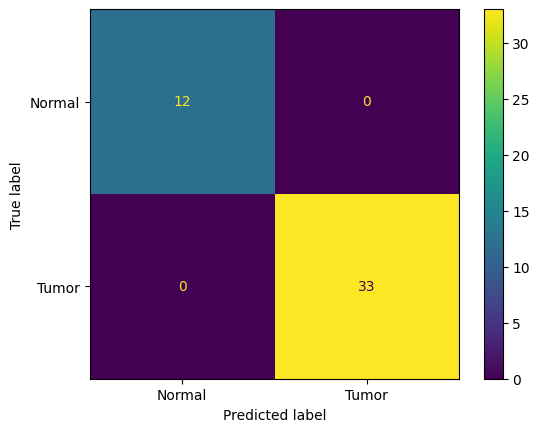

In [19]:
## Confusion matrix
cm = confusion_matrix(y_test, all_pred_lung)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels = ["Normal", 'Tumor'])
disp.plot()
plt.show()

In [20]:
## Classification report
classification_report(y_test, all_pred_lung)

'              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00        12\n         1.0       1.00      1.00      1.00        33\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'

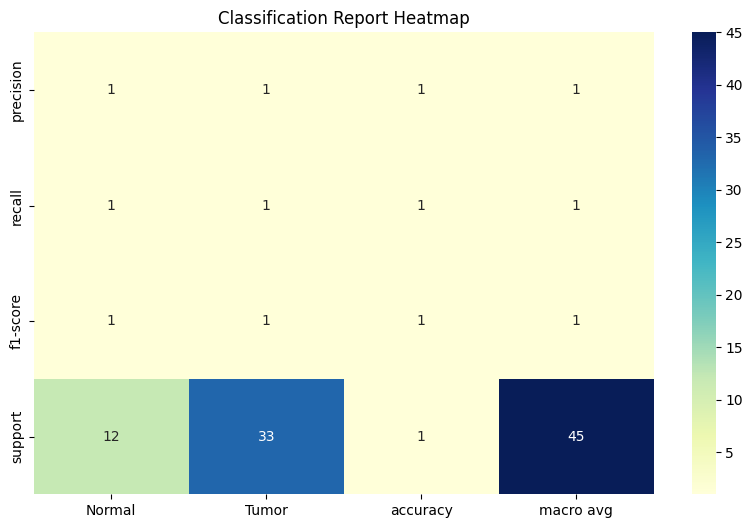

In [21]:
from sklearn.metrics import classification_report
import seaborn as sns
import pandas as pd

# Generate the classification report
report = classification_report(y_test, all_pred_lung, target_names=["Normal", "Tumor"], output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap="YlGnBu")
plt.title('Classification Report Heatmap')
plt.show()